In [11]:
from math import exp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

In [12]:
def sigmoid(num):
    '''  
    :param num: 待计算的x
    :return: sigmoid之后的数值
    '''
    if type(num) == int or type(num) == float:        
        return 1.0 / (1 + exp(-1 * num))
    else:
        raise ValueError
# print( 'only int or float data can compute sigmoid')

In [13]:
class logistic():
    def __init__(self, x, y):
        if type(x) == type(y) == list:
            self.x = np.array(x)
            self.y = np.array(y)
        elif type(x) == type(y) == np.ndarray:
            self.x = x
            self.y = y
        else:
            raise ValueError
# ,( 'input data error')
 
    def sigmoid(self, x):
        
        '''
        :param x: 输入向量
        :return: 对输入向量整体进行simgoid计算后的向量结果
        '''
        s = np.frompyfunc(lambda x: sigmoid(x), 1, 1)
        return s(x)
 
    def train_with_punish(self, alpha, errors, punish=0.0001):
        '''
 
        :param alpha: alpha为学习速率
        :param errors: 误差小于多少时停止迭代的阈值
        :param punish: 惩罚系数
        :param times: 最大迭代次数
        :return:
        '''
        self.punish = punish
        dimension = self.x.shape[1]
        self.theta = np.random.random(dimension)
        compute_error = 100000000
        times = 0
        while compute_error > errors:            
            res = np.dot(self.x, self.theta)
            delta = self.sigmoid(res) - self.y
            self.theta = self.theta - alpha * np.dot(self.x.T, delta) - punish * self.theta # 带惩罚的梯度下降方法
            compute_error = np.sum(delta)
            times += 1
 
    def predict(self, x):        
        '''
        :param x: 给入新的未标注的向量
        :return: 按照计算出的参数返回判定的类别
        '''
        x = np.array(x)
        if self.sigmoid(np.dot(x, self.theta)) > 0.5:
            return 1
        else:
            return 0

In [14]:
def test1():        
        '''
        用来进行测试和画图，展现效果
        :return:
        '''
        x, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=0, center_box=(10, 20))
        x1 = []
        y1 = []
        x2 = []
        y2 = []
        for i in range(len(y)):
            if y[i] == 0:
                x1.append(x[i][0])
                y1.append(x[i][1])
            elif y[i] == 1:
                x2.append(x[i][0])
                y2.append(x[i][1])
        # 以上均为处理数据，生成出两类数据
        p = logistic(x, y)
        p.train_with_punish(alpha=0.00001, errors=0.005, punish=0.01) # 步长是0.00001，最大允许误差是0.005，惩罚系数是0.01
        x_test = np.arange(10, 20, 0.01)
        y_test = (-1 * p.theta[0] / p.theta[1]) * x_test
        plt.plot(x_test, y_test, c='g', label='logistic_line')
        plt.scatter(x1, y1, c='r', label='positive')
        plt.scatter(x2, y2, c='b', label='negative')
        plt.legend(loc=2)
        plt.title('punish value = ' + p.punish.__str__())
        plt.show()

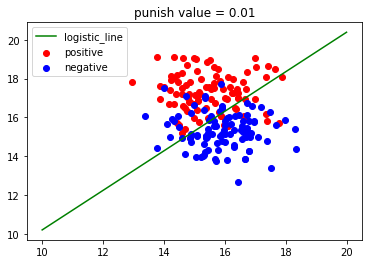

In [15]:
if __name__ == '__main__':
    test1()